In [55]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,classification_report



1.	For the given dataset, perform the tasks below and write your observations
a.	PimaIndianDiabetes.csv
b.	Perform EDA
c.	Build a decision tree classifier
d.	Compare the accuracy scores with gini index and entropy
e.	Evaluate the performance and explain the metrics


In [2]:
data=pd.read_csv("C://Users//abhis//Downloads//slc//diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
for i in data.columns:
    print(i,data[i].nunique())

Pregnancies 17
Glucose 136
BloodPressure 47
SkinThickness 51
Insulin 186
BMI 248
DiabetesPedigreeFunction 517
Age 52
Outcome 2


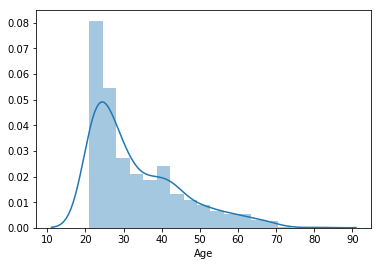

In [7]:
sns.distplot(data.Age)

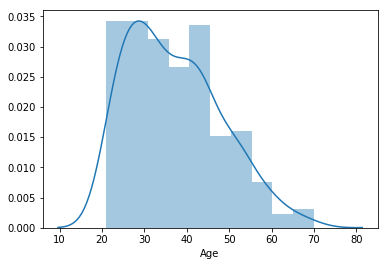

In [8]:
#Most people around 20-45 have diabetes
sns.distplot(data[data.Outcome==1]["Age"])

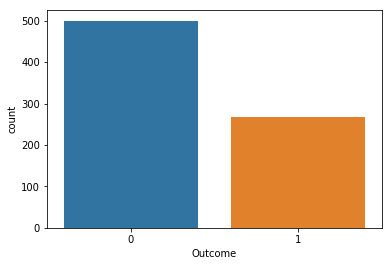

In [16]:
sns.countplot(data.Outcome)


In [17]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

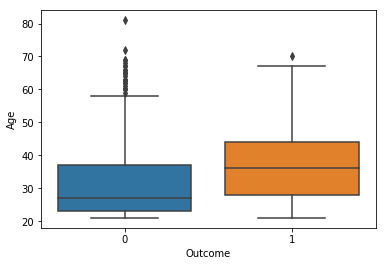

In [18]:
#Age is the factor as wecan see here
sns.boxplot(data.Outcome,data.Age)

In [19]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

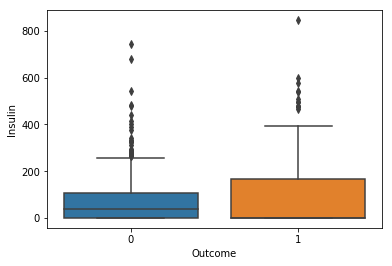

In [20]:
sns.boxplot(data.Outcome,data.Insulin)

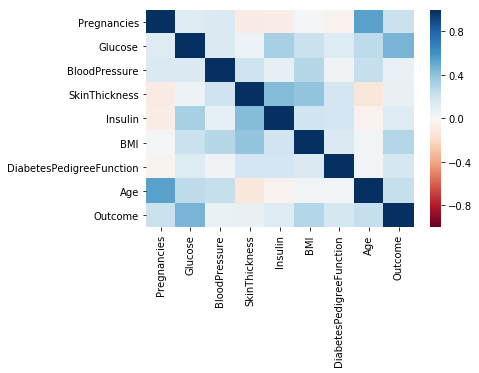

In [27]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap="RdBu")

In [64]:
np.corrcoef(data.Insulin,data.SkinThickness)

array([[1.        , 0.43678257],
       [0.43678257, 1.        ]])

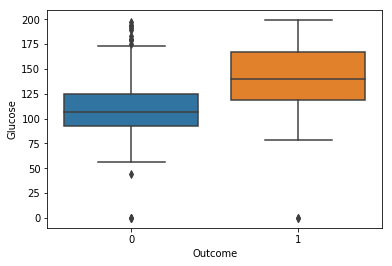

In [28]:
sns.boxplot(data.Outcome,data.Glucose)

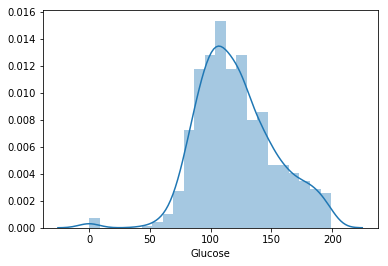

In [30]:
sns.distplot(data.Glucose)

In [31]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


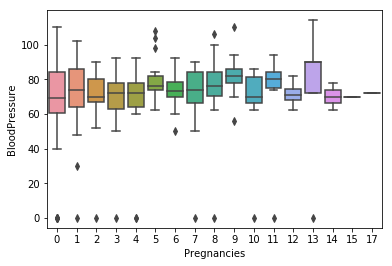

In [68]:
sns.boxplot(data[data.Outcome==1]["Pregnancies"],data.BloodPressure)

In [32]:
data.groupby("Outcome").agg({"BMI":np.mean})

,BMI
Outcome,
0,30.304200
1,35.142537


In [69]:
data.groupby("Outcome").agg({"Glucose":np.mean})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [70]:
data.groupby("Outcome").agg({"BloodPressure":np.mean})

,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [34]:
data.groupby("Outcome").agg({"Age":np.median})

,Age
Outcome,
0,27
1,36


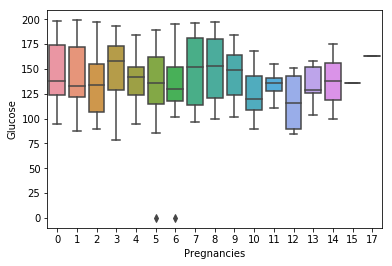

In [36]:
sns.boxplot(data[data.Outcome==1]["Pregnancies"],data.Glucose)

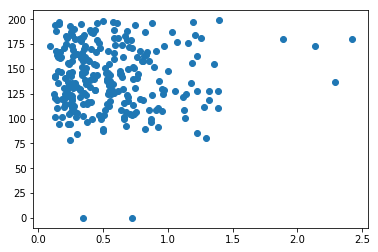

In [67]:
plt.scatter(data[data.Outcome==1]["DiabetesPedigreeFunction"],data[data.Outcome==1]["Glucose"])

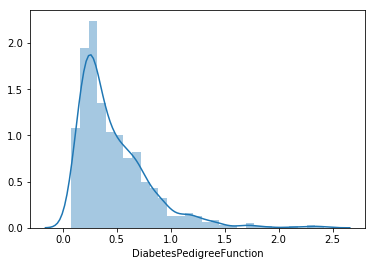

In [37]:
sns.distplot(data.DiabetesPedigreeFunction)

In [38]:
std=StandardScaler()
scaled_data=std.fit_transform(data.drop("Outcome",axis=1))

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
scaled_data=pd.DataFrame(scaled_data,columns=data.columns[:-1])

In [41]:
scaled_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [42]:
x=scaled_data
y=data.Outcome

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)

# for criterian default is 'gini'

In [43]:
#for criterian default is 'gini'
dtree=DecisionTreeClassifier()
predict_dtree=dtree.fit(xtrain,ytrain).predict(xtest)

In [44]:
accuracy_score(predict_dtree,ytest)

0.6623376623376623

In [45]:
cohen_kappa_score(predict_dtree,ytest)

0.266845703125

# For criterion is 'entropy'

In [50]:
## For criterion is 'entropy'
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
predict_dtree=dtree.fit(xtrain,ytrain).predict(xtest)

In [51]:
accuracy_score(predict_dtree,ytest)

0.7142857142857143

In [52]:
cohen_kappa_score(predict_dtree,ytest)

0.3098859315589354

In [54]:
confusion_matrix(ytest,predict_dtree)

array([[133,  17],
       [ 49,  32]], dtype=int64)

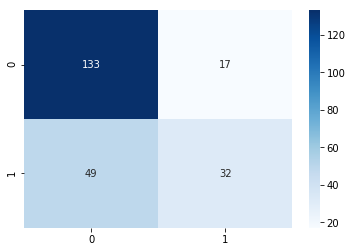

In [53]:
sns.heatmap(confusion_matrix(ytest,predict_dtree), annot=True, cmap='Blues',fmt='g')

#The number of true positive and true negative are 133 and 32.17 are the False Poitive and 49 ar the false negative

133-Patients correctly predicted of not having Diabetes.
32-having diabetes. (they both are correctly predicted)

In [57]:
print(classification_report(ytest,predict_dtree))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       150
           1       0.65      0.40      0.49        81

   micro avg       0.71      0.71      0.71       231
   macro avg       0.69      0.64      0.65       231
weighted avg       0.70      0.71      0.69       231



Text(0.5, 0, 'False Positive Rate')

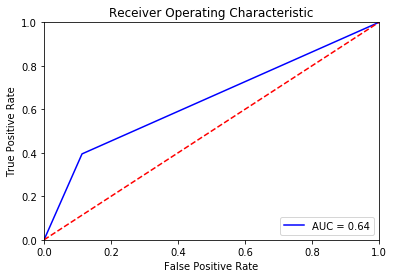

In [63]:
#Initialising
from sklearn import metrics
probs = dtree.fit(xtrain,ytrain).predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, predict_dtree)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')